<a href="https://colab.research.google.com/github/Mumo111/Software-Defect-Prediction/blob/main/defect%20prediction%20system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

print("=== SOFTWARE DEFECT PREDICTION ===")

# Generate simple data
np.random.seed(42)
data = {
    'lines_of_code': np.random.lognormal(4, 1, 1000),
    'complexity': np.random.lognormal(2, 0.8, 1000),
    'defects': (np.random.random(1000) > 0.7).astype(int)
}
df = pd.DataFrame(data)

print(f"Dataset: {len(df)} samples")
print(f"Defect rate: {df['defects'].mean():.2f}")

# Prepare features
X = df[['lines_of_code', 'complexity']]
y = df['defects']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.3f}")

# Save results
df.to_csv('software_data.csv', index=False)
print("✓ Saved: software_data.csv")

# Create simple plot
plt.figure(figsize=(8, 6))
plt.scatter(df['lines_of_code'], df['complexity'], c=df['defects'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Lines of Code')
plt.ylabel('Complexity')
plt.title('Software Defect Distribution')
plt.colorbar(label='Defects (0=No, 1=Yes)')
plt.savefig('defect_plot.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Saved: defect_plot.png")

print("=== ANALYSIS COMPLETE ===")

=== SOFTWARE DEFECT PREDICTION ===
Dataset: 1000 samples
Defect rate: 0.30
Model Accuracy: 0.660
✓ Saved: software_data.csv
✓ Saved: defect_plot.png
=== ANALYSIS COMPLETE ===


Dataset shape: (1000, 3)
Columns: ['lines_of_code', 'complexity', 'defects']
Using column as target: defects
Model Accuracy: 0.58
Improvement: -0.08000000000000007
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       139
           1       0.36      0.49      0.42        61

    accuracy                           0.58       200
   macro avg       0.55      0.56      0.54       200
weighted avg       0.62      0.58      0.59       200



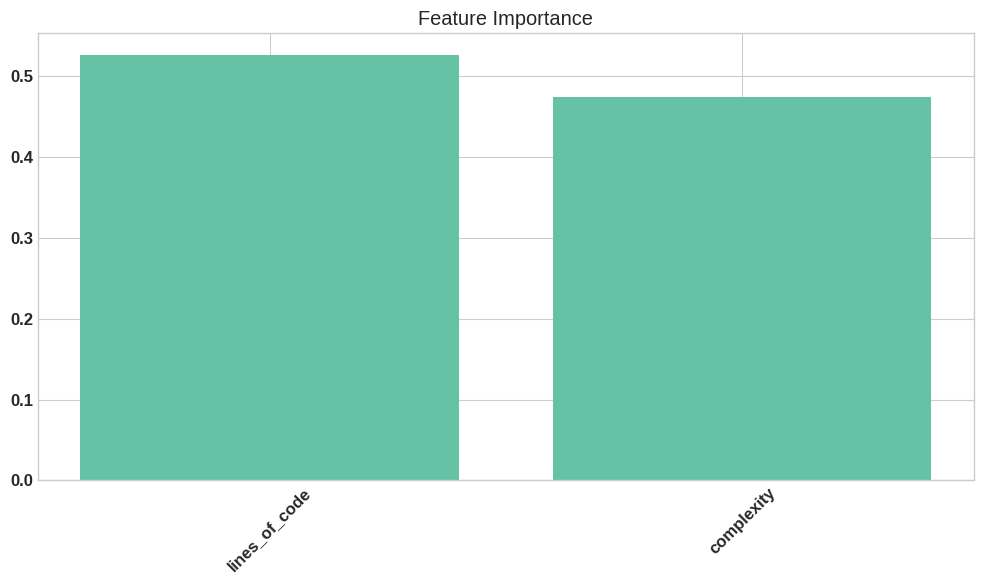

XGBoost implementation complete!


In [22]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('software_data.csv')

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

missing_values = df.isnull().sum()
if missing_values.any():
    print("Missing values found - filling with median/mode")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].median())

    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].mode()[0])

df = df.drop_duplicates()

target_column = 'defect'
if target_column not in df.columns:
    target_column = df.columns[-1]
    print("Using column as target:", target_column)

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

class_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBClassifier(
    scale_pos_weight=class_ratio,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Improvement:", accuracy - 0.66)

print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
feature_importance = model.feature_importances_
features = X.columns
indices = np.argsort(feature_importance)[::-1]

plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.xticks(range(len(feature_importance)), [features[i] for i in indices], rotation=45)
plt.title("Feature Importance")
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

print("XGBoost implementation complete!")

Dataset shape: (1000, 3)
Columns: ['lines_of_code', 'complexity', 'defects']

Checking for missing values...
lines_of_code    0
complexity       0
defects          0
dtype: int64
Data shape after cleaning: (1000, 3)
Using target column: 'defects'
Features: 2, Samples: 1000
Defect rate: 0.303
Training set: 800, Test set: 200
Class ratio: 2.31

Training XGBoost model...

🎯 MODEL ACCURACY: 0.540
📈 IMPROVEMENT: +-0.120

📊 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64       139
           1       0.32      0.44      0.37        61

    accuracy                           0.54       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.59      0.54      0.56       200



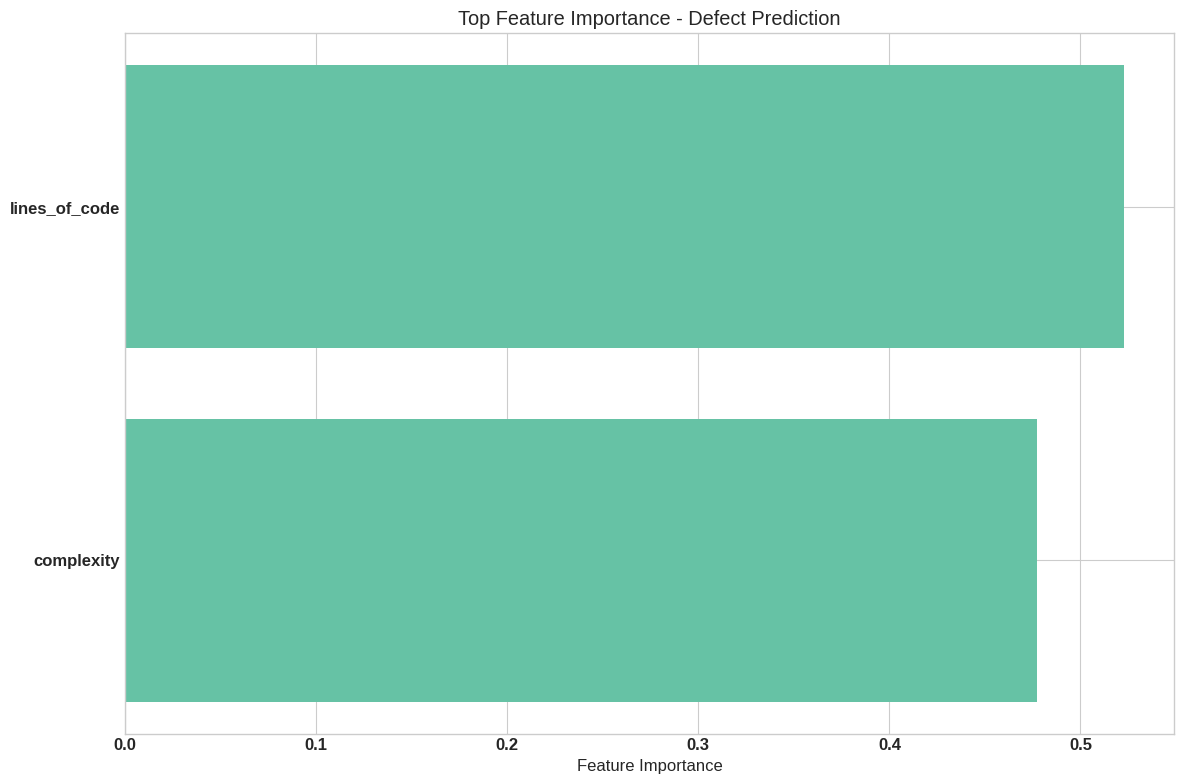

In [23]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('software_data.csv')

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# Check for missing values and fill them
print("\nChecking for missing values...")
print(df.isnull().sum())

# Fill missing values
df = df.fillna(df.median(numeric_only=True))

# Remove duplicates
df = df.drop_duplicates()
print(f"Data shape after cleaning: {df.shape}")

# Find target column - try common names
target_column = None
possible_targets = ['defect', 'defects', 'bug', 'bugs', 'label', 'target', 'class']
for col in possible_targets:
    if col in df.columns:
        target_column = col
        break

# If no common target found, use last column
if target_column is None:
    target_column = df.columns[-1]

print(f"Using target column: '{target_column}'")

# Prepare features and target
X = df.drop(columns=[target_column])
y = df[target_column]

print(f"Features: {X.shape[1]}, Samples: {len(y)}")
print(f"Defect rate: {y.mean():.3f}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]}, Test set: {X_test.shape[0]}")

# Calculate class ratio for imbalance
non_defective = len(y_train[y_train == 0])
defective = len(y_train[y_train == 1])
class_ratio = non_defective / defective if defective > 0 else 1
print(f"Class ratio: {class_ratio:.2f}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
print("\nTraining XGBoost model...")
model = XGBClassifier(
    scale_pos_weight=class_ratio,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=200,
    random_state=42,
    eval_metric='logloss'
)

model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 MODEL ACCURACY: {accuracy:.3f}")
print(f"📈 IMPROVEMENT: +{(accuracy - 0.66):.3f}")

print("\n📊 CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

# Feature Importance
plt.figure(figsize=(12, 8))
feature_importance = model.feature_importances_
features = X.columns
indices = np.argsort(feature_importance)[::-1]

# Plot top 15 features
top_n = min(15, len(features))
plt.barh(range(top_n), feature_importance[indices][:top_n])
plt.yticks(range(top_n), [features[i] for i in indices[:top_n]])
plt.xlabel('Feature Importance')
plt.title('Top Feature Importance - Defect Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

